In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [114]:
db = pd.read_csv('data/train.csv')
db.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [115]:
db.head()
# titanic_feature_names = db.columns.values
# class_feature_names = ['False', 'True']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [116]:
db.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [117]:
# Drop the Name column as it is not useful
db.drop(['Name','Cabin'], axis=1, inplace=True)
db.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [118]:
# Put the mean of each numerical column in the missing values
columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']
for column in columns:
    db[column].fillna(db[column].mean(), inplace=True)
db.isnull().sum()

C:\Users\abdfa\AppData\Local\Temp\ipykernel_38496\1524098949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db[column].fillna(db[column].mean(), inplace=True)


PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [119]:
# Put the mode for the missing values in Category columns
columns = ['HomePlanet','CryoSleep','Destination','VIP']
for column in columns:
    db[column].fillna(db[column].mode()[0], inplace=True)
db.isnull().sum()

C:\Users\abdfa\AppData\Local\Temp\ipykernel_38496\1830445327.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db[column].fillna(db[column].mode()[0], inplace=True)
C:\Users\abdfa\AppData\Local\Temp\ipykernel_38496\1830445327.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db[column].fillna(db[column].mod

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# split the data into train and test
X = db.drop('Transported', axis=1)
y = db['Transported']

# One hot encoding for the categorical columns by specifying the columns
X = pd.get_dummies(X, columns=['HomePlanet','CryoSleep','Destination','VIP'])
X


,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False,False,True,True,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,True,False,False,False,True,True,False
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,True,False,False,False,True,False,True
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,True,False,False,False,True,True,False
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,False,True,False,True,False,True,False,False,False,True
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,True,False,True,False,True,False
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,True,False,False,True,False,False,False,True,True,False
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,False,True,False,True,False,True,False,False,True,False


In [121]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [123]:
# Check the accuracy of the model
model.score(X_test, y_test)

0.718558282208589

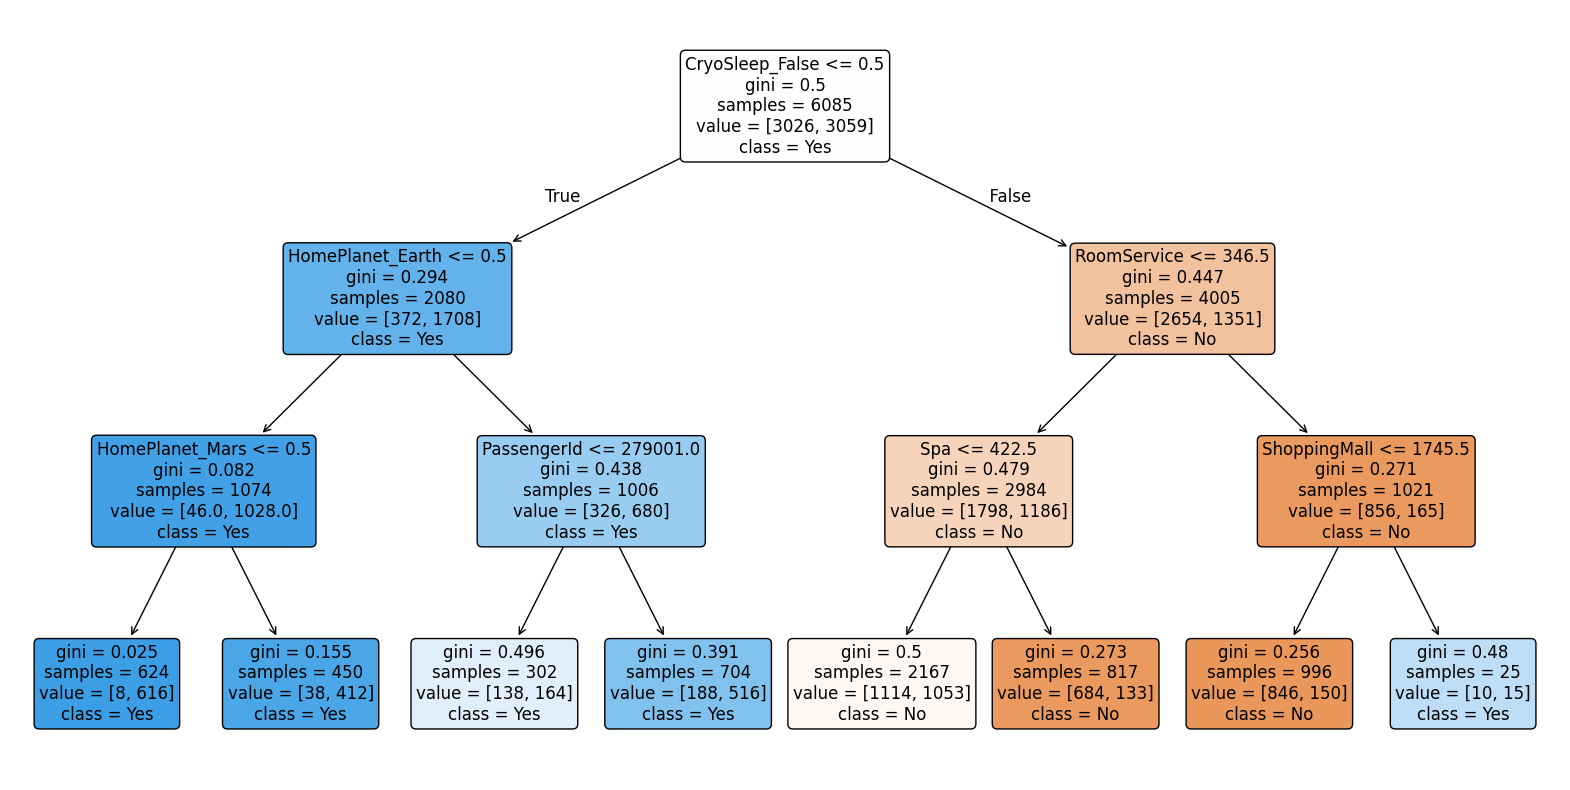

In [124]:
from sklearn import tree
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size for better readability
tree.plot_tree(model, 
               filled=True,
                feature_names=X.columns,
                class_names=['No', 'Yes'], 
               rounded=True,
               fontsize=12)
plt.show()

## Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
# Check the accuracy of the model
model.score(X_test, y_test)


0.7779907975460123

## Submission

In [127]:
test_db = pd.read_csv('data/test.csv')

In [128]:
# Preprocessing that was done on the training data
test_db.drop(['Name','Cabin'], axis=1, inplace=True)
columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']
for column in columns:
    db[column].fillna(db[column].mean(), inplace=True)
columns = ['HomePlanet','CryoSleep','Destination','VIP']
for column in columns:
    db[column].fillna(db[column].mode()[0], inplace=True)

test_db = pd.get_dummies(test_db, columns=['HomePlanet','CryoSleep','Destination','VIP'])


C:\Users\abdfa\AppData\Local\Temp\ipykernel_38496\2000754624.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db[column].fillna(db[column].mean(), inplace=True)


In [132]:
# predict the values
y_pred = model.predict(test_db)

In [133]:
# Make a submission dataframe
submission = pd.DataFrame({'PassengerId': test_db['PassengerId'], 'Transported': y_pred})
submission.to_csv('submission.csv', index=False)
submission.head()


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
